In [2]:
#Importing requirred libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

#### Forest Fires

In [ ]:
# Loading the data
from google.colab import files
doc = files.upload()

Saving forestfires.csv to forestfires.csv


In [ ]:
# Importing original dataset
frst_df = pd.read_csv('forestfires.csv')
frst_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
frst_df['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [ ]:
frst_df['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

    - Since, One Hot encoding increase the features which increase the complexity of the model, and since month and day shows ordinal data.
    - We better use LabelEncoder to encode them and will ignore One Hot encoded on month and day columns.
    - Since, doing this reduce the features, reduce the computation and reduce the complexity  of the  model.
  

In [ ]:
# Creating new dataframe with required columns only
df = frst_df[['month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area','size_category']]
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [ ]:
# Mapping the month and day column with numbers such as jan will be mapped as 1, feb as 2 and so on.
# Same way for day, mon will be mapped as 1, tue as 2 and so on

months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days = ['mon','tue','wed','thu','fri','sat','sun']

# Creating a custom mapping from month and day names to numbers
month_mapping = {month: i+1 for i, month in enumerate(months)}
day_mapping = {day: i+1 for i, day in enumerate(days)}

# Applying the custom mapping
df['month'] = df['month'].map(month_mapping)
df['day'] = df['day'].map(day_mapping)
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


##### Descriptive Statistics

In [ ]:
df.dtypes

month              int64
day                int64
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
size_category     object
dtype: object

In [ ]:
df.shape

(517, 12)

    Initially, there were 29 columns, now columns are reduced to 12 only

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    int64  
 1   day            509 non-null    int64  
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  size_category  509 non-null    object 
dtypes: float64(8), int64(3), object(1)
memory usage: 51.7+ KB


In [ ]:
df.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,7.481336,4.251473,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908
std,2.283574,2.079053,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357
min,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,7.000000,2.000000,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000
50%,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000
75%,9.000000,6.000000,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000
max,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


##### EDA

In [ ]:
# Checking if null values present in any column
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [ ]:
# Checking any duplicate rows present
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,8,3,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,8,7,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,3,6,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,6,5,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,8,4,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,8,6,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,8,2,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,8,5,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


    Here, our dataset contains duplicate rows, so we will drop them.
    Since, duplicate rows don't play any positive role, same information is just repeating so we will drop them.

In [ ]:
# Checking any duplicate column present
df.T.duplicated()

month            False
day              False
FFMC             False
DMC              False
DC               False
ISI              False
temp             False
RH               False
wind             False
rain             False
area             False
size_category    False
dtype: bool

In [ ]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category


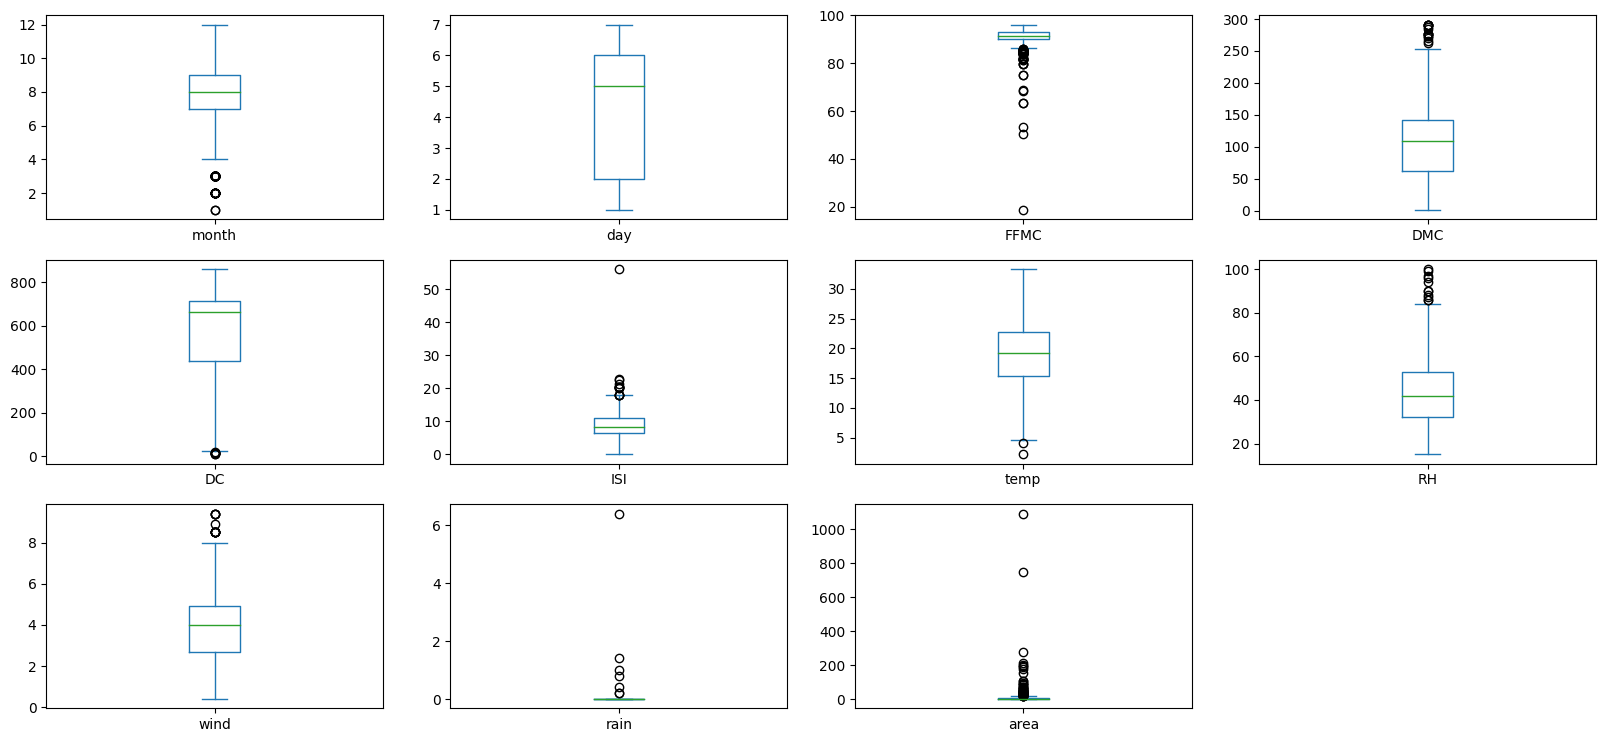

In [ ]:
# Boxplot to check the outliers and distributiom of the data, which can also be seen below using density plot
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(20,9))
plt.show()

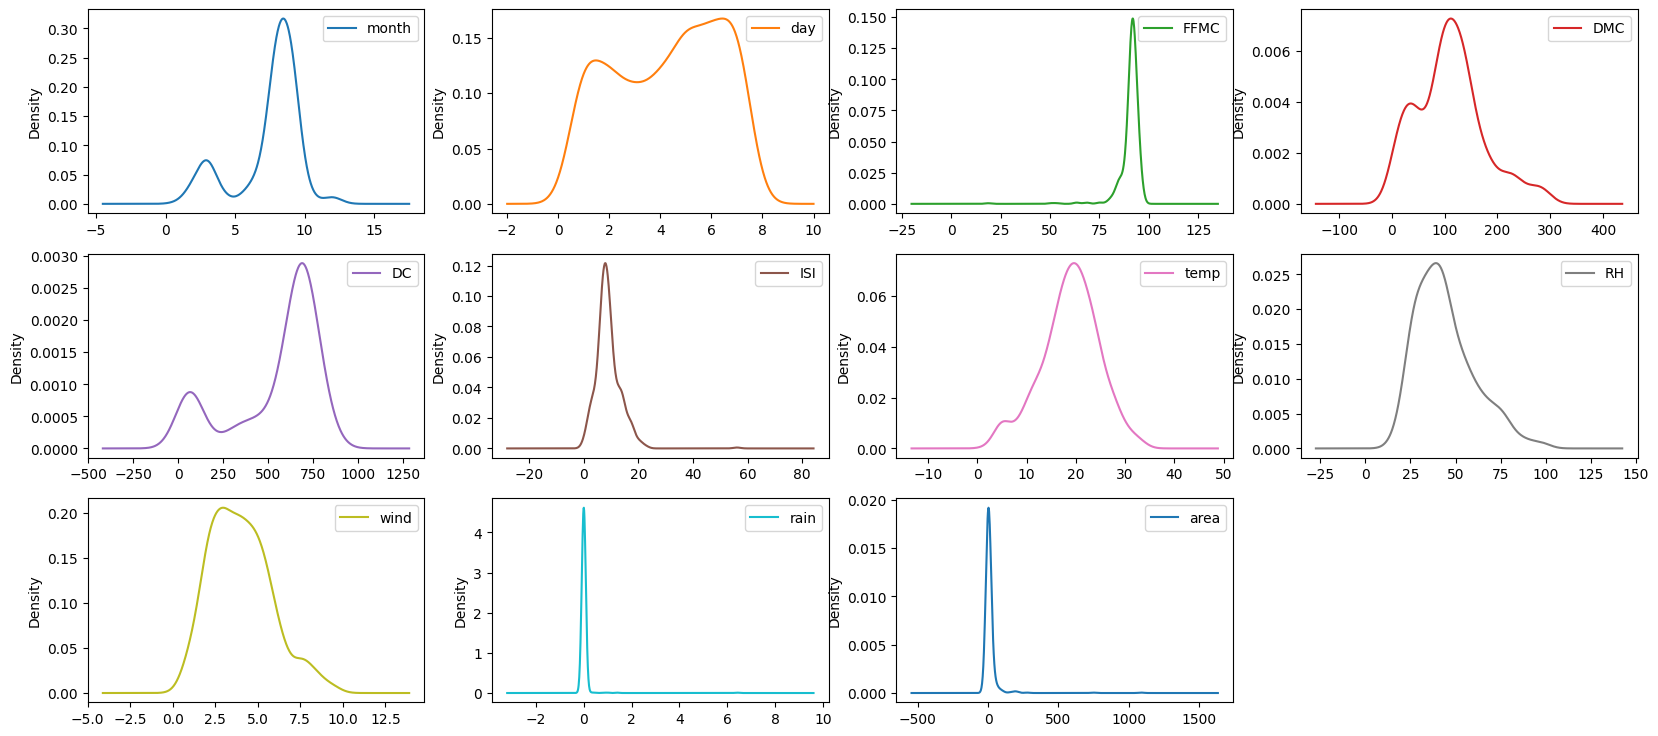

In [ ]:
df.plot(kind='density',subplots=True,layout=(3,4),sharex=False, figsize=(20,9))
plt.show()

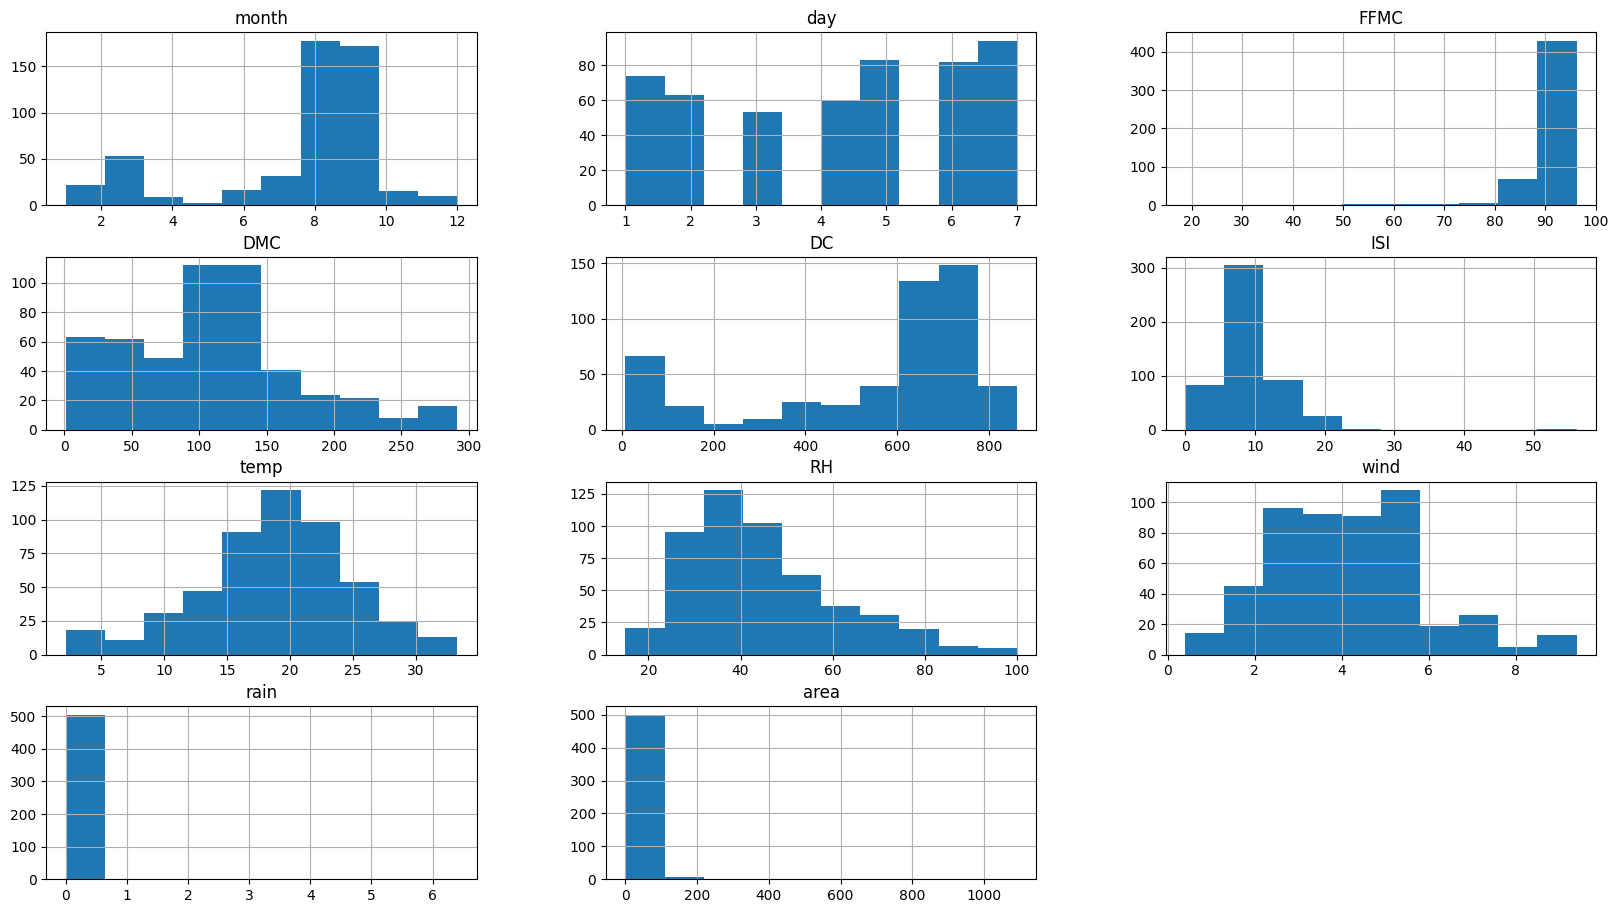

In [ ]:
# temp shows the normal distribution with very less skewness
df.hist(figsize=(20,11))
plt.show()

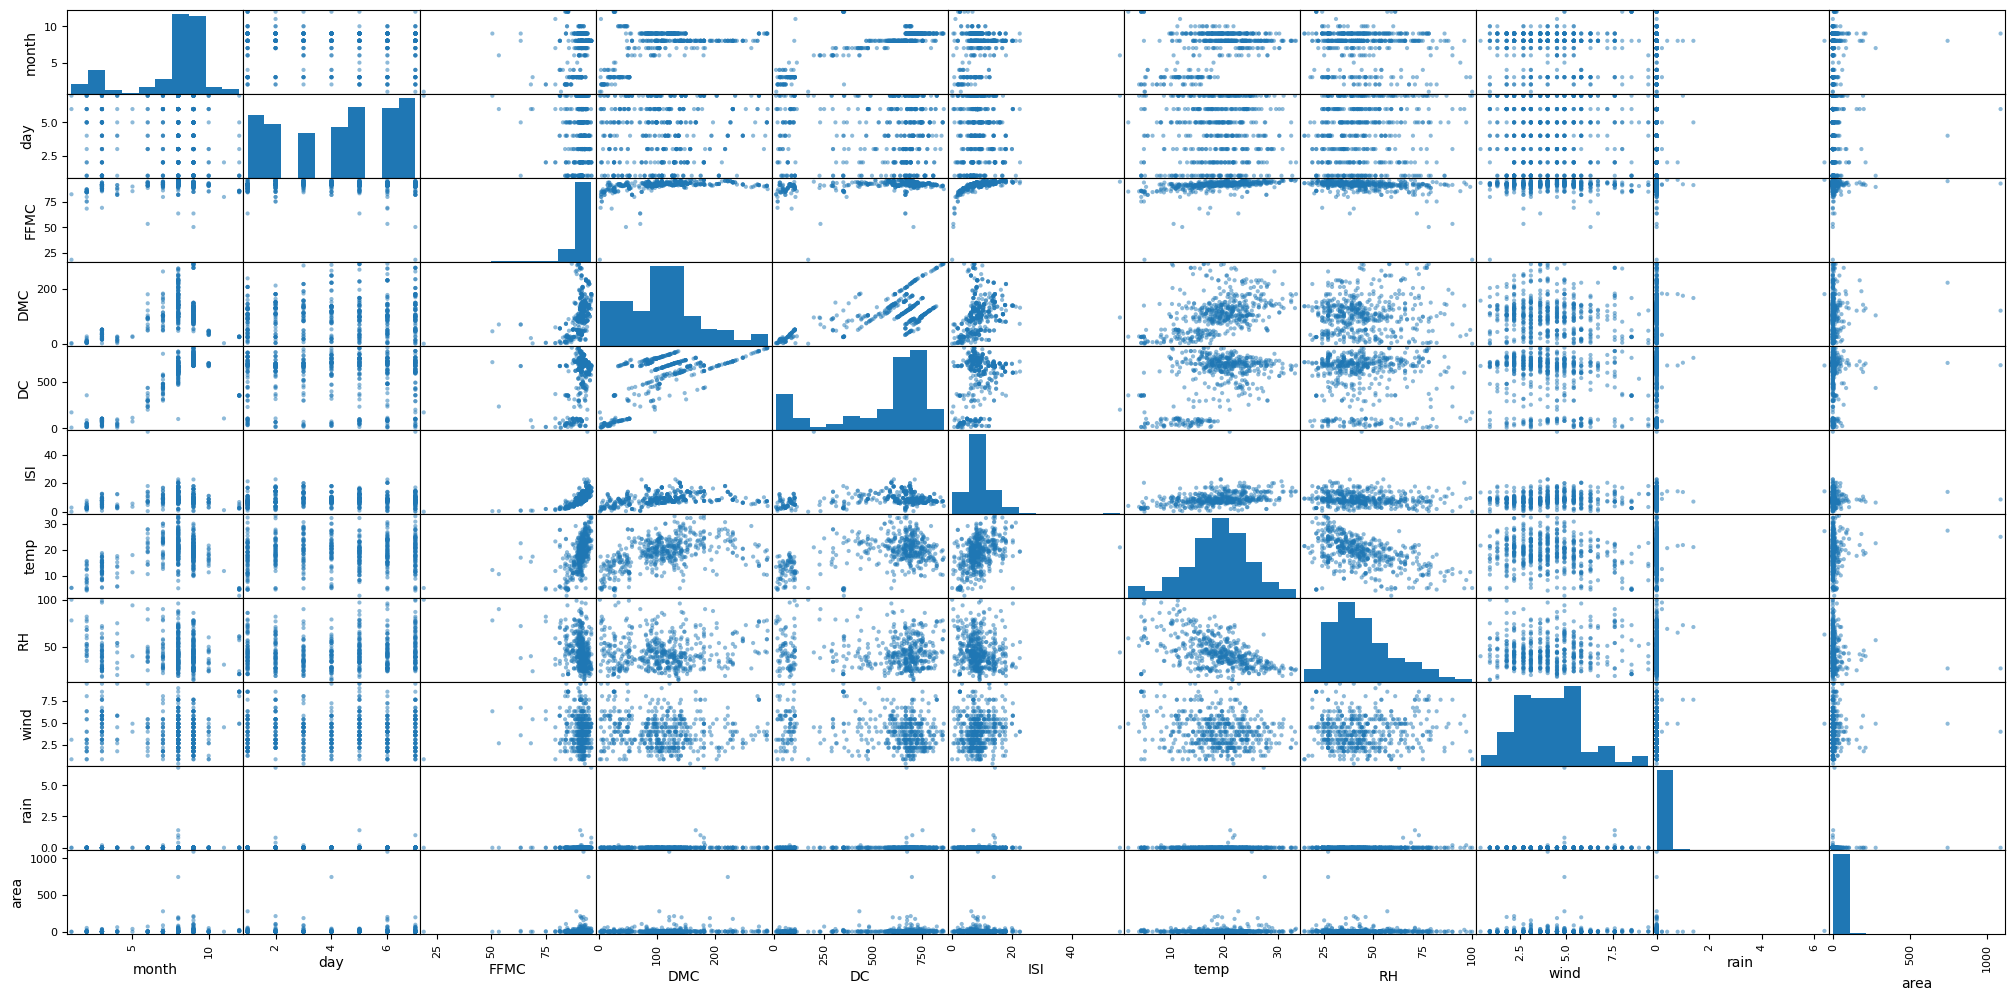

In [ ]:
# Checking corrlation using scatter_matrix
scatter_matrix(df,figsize=(25,12))
plt.show()

##### Feature Engineering

In [ ]:
# Selecting the columns to be standardized
columns_to_standardize = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']

# Creating a StandardScaler object
scaler = StandardScaler()

# Applying standardization to the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,0.0,0.00,small
1,10,2,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,0.0,0.00,small
2,10,6,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,0.0,0.00,small
3,3,5,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.2,0.00,small
4,3,7,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894,0.0,6.44,large
513,8,7,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136,0.0,54.29,large
514,8,7,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370,0.0,11.16,large
515,8,6,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333,0.0,0.00,small


In [ ]:
# Splitting data to dependent and independent variable
X = df.iloc[:,:11]
y = df.iloc[:,11]

In [ ]:
# Train and Test split of the dependent and independent variable
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((407, 11), (407,), (102, 11), (102,))

##### Model Building

###### Hyper-parameter tuning - GridSearchCV

In [ ]:
#Creating SVC() classifier to tune the model to get optimal values of hyper-parameters
clf = SVC()
param_grid = [{'kernel':['rbf','linear','poly','sigmoid'],'gamma':[100,50,10,5,0.5,0.1,0.01,0.001,0.0001],'C':[50,20,10,7,5,4,3,2,1,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf,param_grid,cv=10,verbose=281)
gsv.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
[CV 1/10; 183/432] START C=4, gamma=100, kernel=poly............................
[CV 1/10; 183/432] END C=4, gamma=100, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/10; 183/432] START C=4, gamma=100, kernel=poly............................
[CV 2/10; 183/432] END C=4, gamma=100, kernel=poly;, score=1.000 total time=   0.0s
[CV 3/10; 183/432] START C=4, gamma=100, kernel=poly............................
[CV 3/10; 183/432] END C=4, gamma=100, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/10; 183/432] START C=4, gamma=100, kernel=poly............................
[CV 4/10; 183/432] END C=4, gamma=100, kernel=poly;, score=0.976 total time=   0.0s
[CV 5/10; 183/432] START C=4, gamma=100, kernel=poly............................
[CV 5/10; 183/432] END C=4, gamma=100, kernel=poly;, score=0.976 total time=   0.0s
[CV 6/10; 183/432] START C=4, gamma=100, kernel=poly............................
[CV 6/10; 183/432] END C=4, gamma=100, kern

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [50, 20, 10, 7, 5, 4, 3, 2, 1, 0.1, 0.001,
                                0.0001],
                          'gamma': [100, 50, 10, 5, 0.5, 0.1, 0.01, 0.001,
                                    0.0001],
                          'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}],
             verbose=281)

In [ ]:
gsv.best_params_, gsv.best_score_

({'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, 0.9951219512195122)

    - Here, as we can the best parameters to use as a hyperparameters are kernel is 'rbf', gamma is 0.001 and C value as 10 which gives us 99.5%
    accuracy on training data.
    - Which shows that our model is a very good model.
    - As we can see from below confusion matrix there is only one misclassification, which is good to have to avoid overfitting.

In [ ]:
clf = SVC(kernel='rbf',C=10,gamma=0.001)
clf.fit(X_train, y_train)
y_hat_train = clf.predict(X_train)
acc = accuracy_score(y_train,y_hat_train)*100
print('Accuracy: ',acc)
print(confusion_matrix(y_train,y_hat_train))

Accuracy:  99.5085995085995
[[108   1]
 [  1 297]]


In [ ]:
y_hat_test = clf.predict(X_test)
acc = accuracy_score(y_test,y_hat_test)*100
print('Accuracy: ',acc)
print(confusion_matrix(y_test,y_hat_test))

Accuracy:  97.05882352941177
[[26  3]
 [ 0 73]]


    As we can see our model is 97.05% of Accuracy on unseen data which is an excellent model for unseen data to classify the forest fire.

In [ ]:
print(classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

       large       1.00      0.90      0.95        29
       small       0.96      1.00      0.98        73

    accuracy                           0.97       102
   macro avg       0.98      0.95      0.96       102
weighted avg       0.97      0.97      0.97       102



#### Salary Data

In [3]:
# Loading the data
from google.colab import files
doc = files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv
Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [4]:
#Importing the data
train_df = pd.read_csv('SalaryData_Train(1).csv')
test_df = pd.read_csv('SalaryData_Test(1).csv')

In [5]:
train_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
train_df.shape

(30161, 14)

In [7]:
test_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [8]:
test_df.shape

(15060, 14)

In [9]:
col = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']

for i in col:
  print(train_df[i].value_counts())
  print('\n')

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64


 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64


 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64


 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584


##### Descriptive Statistics

In [10]:
train_df.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [11]:
train_df.shape

(30161, 14)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [13]:
train_df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


##### EDA

In [14]:
#Checking if null values present
train_df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [15]:
#Filtering duplicate rows
train_df[train_df.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [16]:
# checking if duplicate columns present
train_df.T.duplicated()

age              False
workclass        False
education        False
educationno      False
maritalstatus    False
occupation       False
relationship     False
race             False
sex              False
capitalgain      False
capitalloss      False
hoursperweek     False
native           False
Salary           False
dtype: bool

In [17]:
# Dropping the duplicate rows and verifying whether dropped or not
train_df.drop_duplicates(inplace=True)
train_df[train_df.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [18]:
#Checking duplicate rows in test dataset
test_df[test_df.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [19]:
# dropping duplicate records from test dataset
test_df.drop_duplicates(inplace=True)
test_df[test_df.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [20]:
# Checking if duplicate column present in the test dataset
test_df.T.duplicated()

age              False
workclass        False
education        False
educationno      False
maritalstatus    False
occupation       False
relationship     False
race             False
sex              False
capitalgain      False
capitalloss      False
hoursperweek     False
native           False
Salary           False
dtype: bool

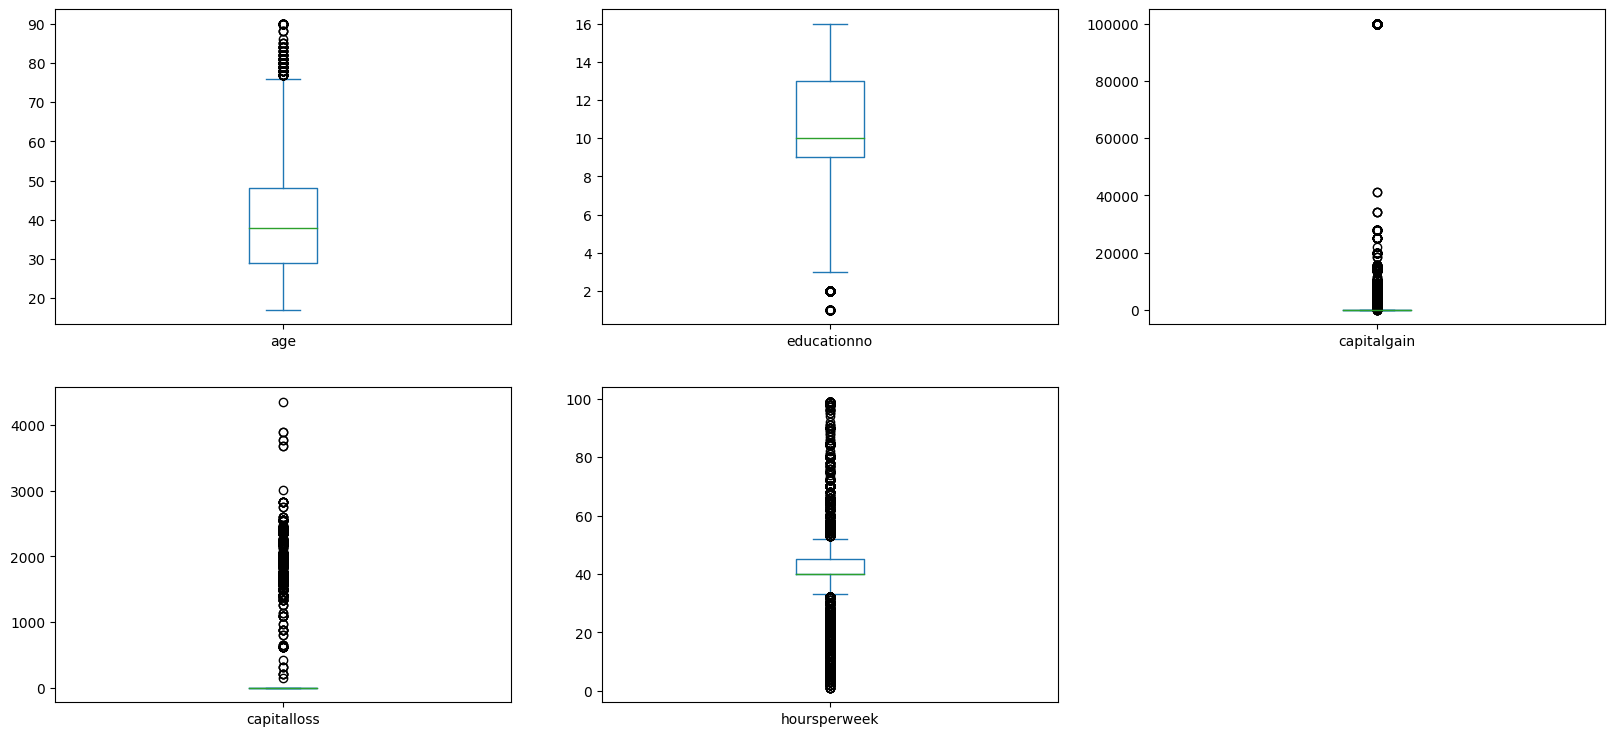

In [21]:
# Here, we can see the columns contains outliers which also shows skewness in the data which we can from density plot below
train_df.plot(kind='box',subplots=True,layout=(2,3),figsize=(20,9))
plt.show()

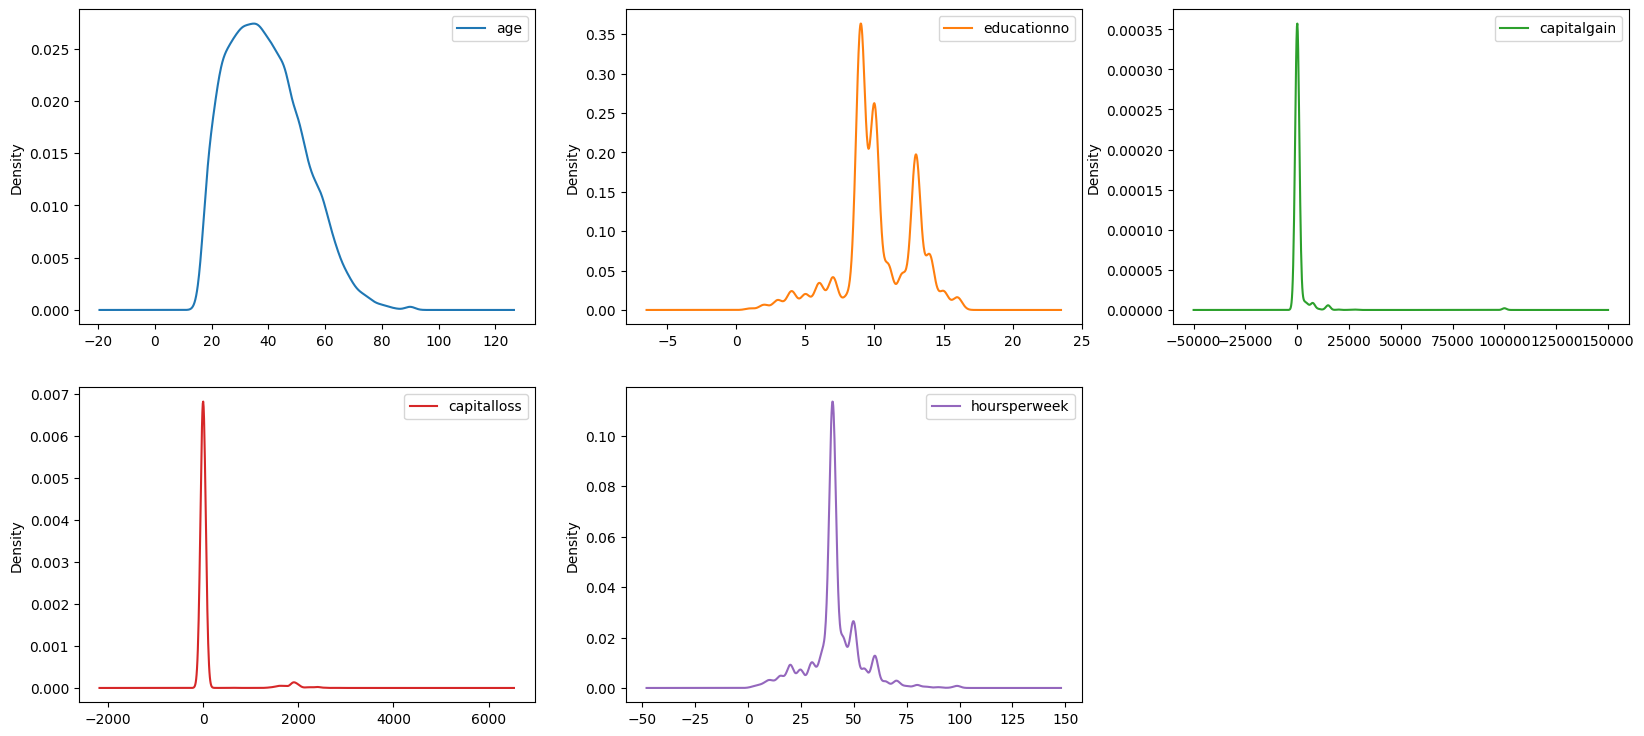

In [22]:
train_df.plot(kind='density',subplots=True,layout=(2,3),sharex=False,figsize=(20,9))
plt.show()

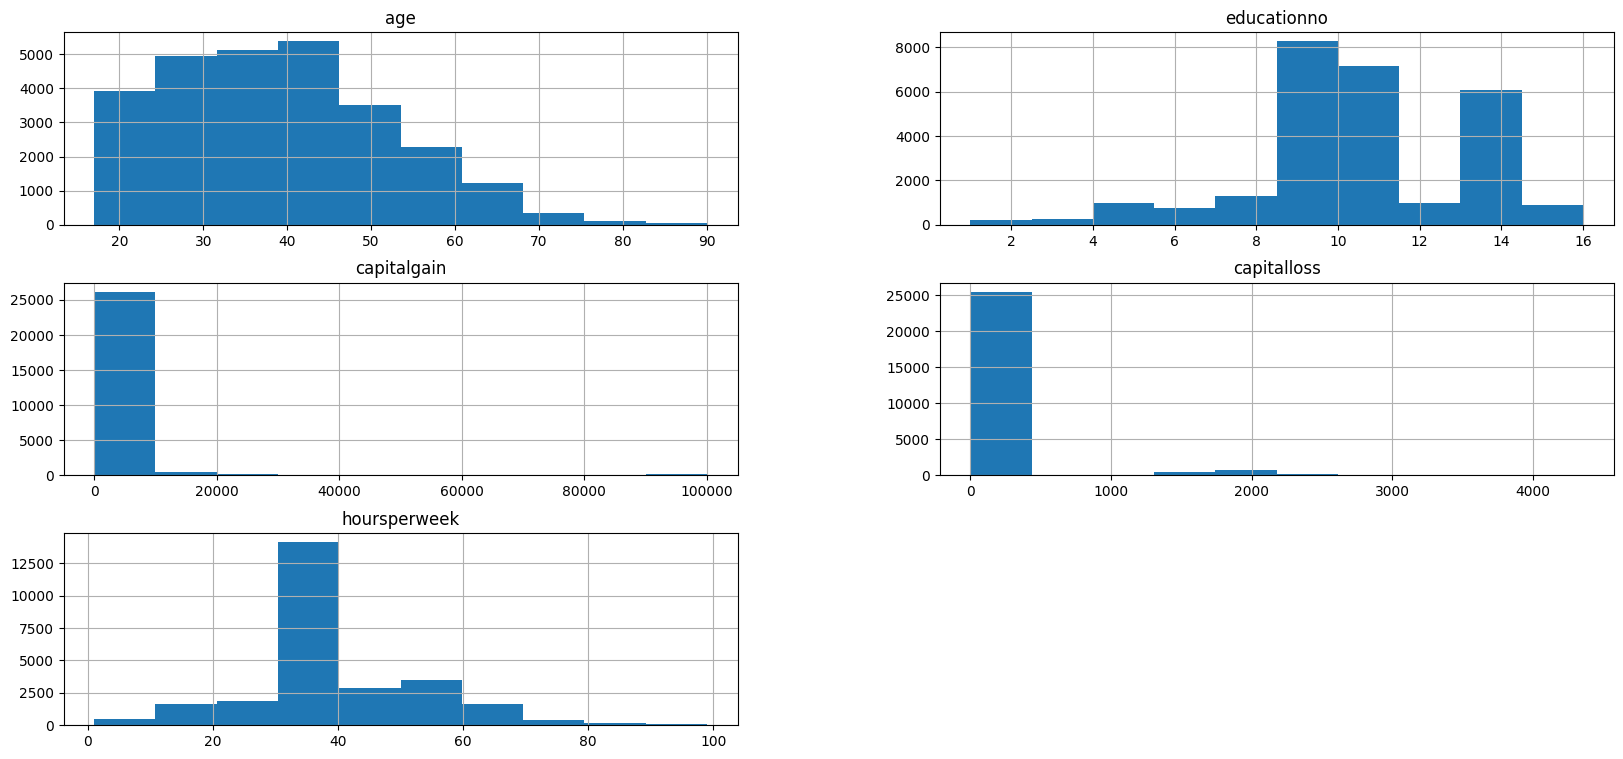

In [23]:
train_df.hist(figsize=(20,9))
plt.show()

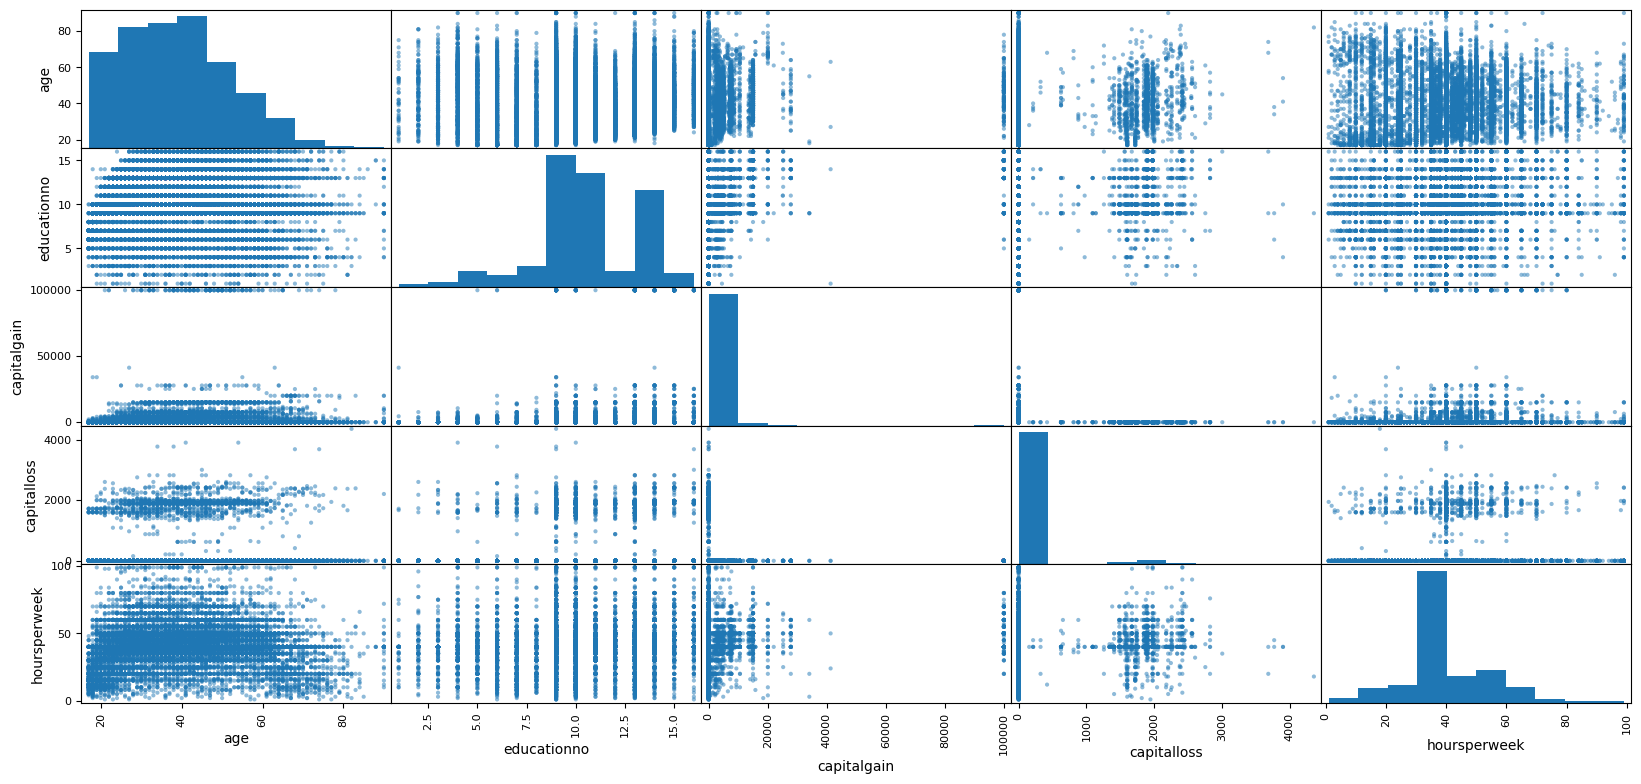

In [24]:
scatter_matrix(train_df,figsize=(20,9))
plt.show()

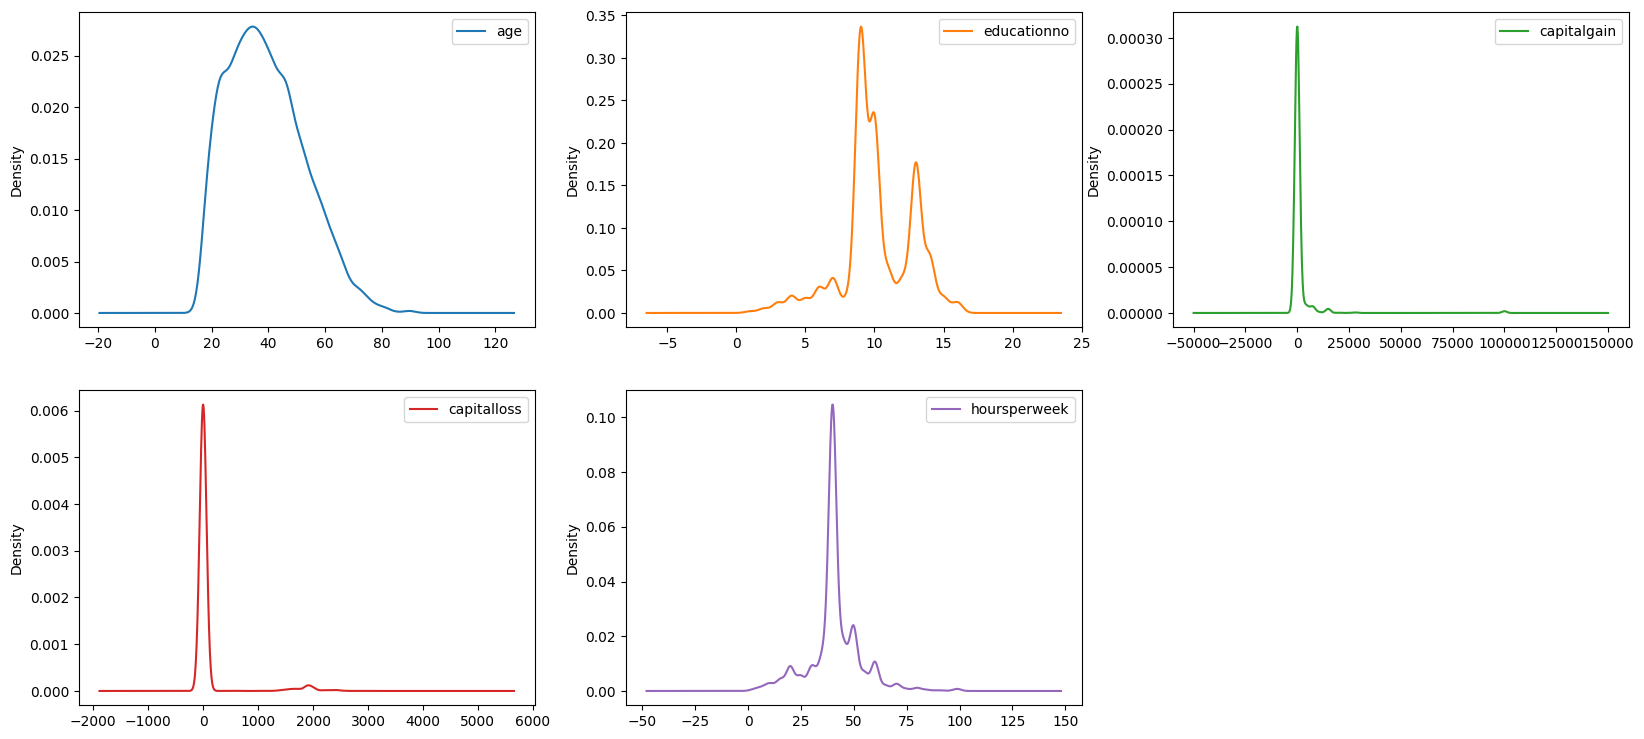

In [25]:
test_df.plot(kind='density',subplots=True,layout=(2,3),sharex=False,figsize=(20,9))
plt.show()

##### Feature Engineering

In [26]:
# LabelEncoding the categorical variables to numerical form, since calculation happens on numerical data only

col_to_encode = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

le = LabelEncoder()
for i in col_to_encode:
  if train_df[i].dtypes=='object' or test_df[i].dtypes=='object':
    train_df[i] = le.fit_transform(train_df[i])
    test_df[i] = le.fit_transform(test_df[i])
train_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,>50K
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,<=50K
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K


In [27]:
test_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [28]:
for i in train_df.columns:
  print(i,'-> max:',train_df[i].max(),' min:',train_df[i].min())

age -> max: 90  min: 17
workclass -> max: 6  min: 0
education -> max: 15  min: 0
educationno -> max: 16  min: 1
maritalstatus -> max: 6  min: 0
occupation -> max: 13  min: 0
relationship -> max: 5  min: 0
race -> max: 4  min: 0
sex -> max: 1  min: 0
capitalgain -> max: 99999  min: 0
capitalloss -> max: 4356  min: 0
hoursperweek -> max: 99  min: 1
native -> max: 39  min: 0
Salary -> max:  >50K  min:  <=50K


    Since, capitalgain and capitalloss has high values which on standardization may improve model performance and do faster convergence and so on.

In [29]:
# Standardizing capitalgain and capitalloss columns to 0 mean and 1 standard deviation to reduce model performance and easy convergence.
columns_to_standardize = ['capitalgain','capitalloss']

ss = StandardScaler()
for i in columns_to_standardize:
  train_df[i] = ss.fit_transform(train_df[i].values.reshape(-1,1))
  test_df[i] = ss.fit_transform(test_df[i].values.reshape(-1,1))
train_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,0.122810,-0.23133,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,-0.155722,-0.23133,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,-0.155722,-0.23133,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,-0.155722,-0.23133,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,-0.155722,-0.23133,40,4,<=50K


In [30]:
test_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,-0.150059,-0.226108,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,-0.150059,-0.226108,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,-0.150059,-0.226108,40,37,>50K
3,44,2,15,10,2,6,0,2,1,0.822747,-0.226108,40,37,>50K
4,34,2,0,6,4,7,1,4,1,-0.150059,-0.226108,30,37,<=50K


In [31]:
train_df.shape

(26903, 14)

In [32]:
# Train test split of training and testing data to train the model on training data and to evaluate on testing data.

X_train, y_train = train_df.iloc[:,:-1], train_df.iloc[:,-1]
X_test, y_test = test_df.iloc[:,:-1], test_df.iloc[:,-1]

In [33]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((26903, 13), (26903,), (14130, 13), (14130,))

##### Model Building

###### Hyper-parameter tuning - GridSearchCV

In [34]:
#Creating SVC() classifier to tune the model to get optimal values of hyper-parameters
clf = SVC()
param_grid = [{'kernel':['rbf','linear'],'gamma':[1,0.1,0.01,0.001],'C':[1,0.1,0.001]}]
gsv = GridSearchCV(clf,param_grid,cv=10,verbose=30)
gsv.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START C=1, gamma=1, kernel=rbf..................................
[CV 1/10; 1/24] END ...C=1, gamma=1, kernel=rbf;, score=0.735 total time= 2.7min
[CV 2/10; 1/24] START C=1, gamma=1, kernel=rbf..................................
[CV 2/10; 1/24] END ...C=1, gamma=1, kernel=rbf;, score=0.732 total time= 2.4min
[CV 3/10; 1/24] START C=1, gamma=1, kernel=rbf..................................
[CV 3/10; 1/24] END ...C=1, gamma=1, kernel=rbf;, score=0.737 total time= 2.4min
[CV 4/10; 1/24] START C=1, gamma=1, kernel=rbf..................................
[CV 4/10; 1/24] END ...C=1, gamma=1, kernel=rbf;, score=0.733 total time= 2.4min
[CV 5/10; 1/24] START C=1, gamma=1, kernel=rbf..................................
[CV 5/10; 1/24] END ...C=1, gamma=1, kernel=rbf;, score=0.741 total time= 2.4min
[CV 6/10; 1/24] START C=1, gamma=1, kernel=rbf..................................
[CV 6/10; 1/24] END ...C=1, gamma=1, kernel=rb

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 0.1, 0.001], 'gamma': [1, 0.1, 0.01, 0.001],
                          'kernel': ['rbf', 'linear']}],
             verbose=30)

In [35]:
gsv.best_params_, gsv.best_score_

({'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}, 0.8227336474742325)

    Here, we can see the best value of hyperparameters are C=1, gamma=0.01, and kernel='rbf' with best score of 0.82 .

In [38]:
clf = SVC(kernel='rbf',C=1,gamma=0.01)
clf.fit(X_train,y_train)
y_hat_train= clf.predict(X_train)
acc = accuracy_score(y_train, y_hat_train) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_train, y_hat_train))

Accuracy = 84.00178418763706
[[19086   937]
 [ 3367  3513]]


    Here, we built the model with the values we get from hyperparameter tuning and we can see the model accuracy as 84%
    which is a good model for future predictions

In [39]:
y_hat_test= clf.predict(X_test)
acc = accuracy_score(y_test, y_hat_test) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_test, y_hat_test))

Accuracy = 83.01486199575372
[[10059   561]
 [ 1839  1671]]


    However, on test/unseen data we are getting model accuracy of 83% which predicts future well.

In [41]:
print(classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

       <=50K       0.85      0.95      0.89     10620
        >50K       0.75      0.48      0.58      3510

    accuracy                           0.83     14130
   macro avg       0.80      0.71      0.74     14130
weighted avg       0.82      0.83      0.82     14130



    Here, our f1-score for class <=50K is 89% where as for >50K is 58%, which may lag for Salary >50k.
    Else model performs well.